In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from utiles import plot_decision_boundary
import pandas as pd
import numpy as np

# Árboles de decisión

Los _árboles de decisión_ son algoritmos de Machine learning capaces de realizar tareas de clasificación y regresión. El algoritmo **CART** (_Classification and Regression Tree_) es el implementado por scikit-learn para el entrenamiento de los árboles de decisión. Este produce sólo _árboles binarios_

Los árboles resultantes son monotécnicos: árboles cuyas regiones de decisión están dadas por segmentos de rectas que siempre son perpendiculares a uno de los ejes de características.

Se prefieren los árboles simples y con menor número de nodos. La idea es buscar una medida en cada nodo de modo que los datos en los nodos hijos sean lo más puros posibles.

La impureza está relacionado a la cantidad de instancias que corresponden a distintas clases en el nodo. Sea $i(N)$ la impureza en el nodo N:

- $i(N)$ será 0 si todos los patrones que están presentes en el nodo pertenecen a la misma clase.
- $i(N)$ será máxima si hay igual cantidad de instancias de cada clase.


Con el algoritmo de estos clasificadores, iniciamos en la raiz del árbol y dividimos los datos teniendo en cuenta la característica que resulte en la mayor ganancia de información (IG). Mediante este proceso, continúa dividiendo cada nodo hijo hasta llegar a nodos hojas puros (es decir las muestras en estos nodos pertenecen a una sola clase), no quedan más características para continuar dividiendo o no quedan más instancias.

Esto en la práctica puede dar como resultado árboles profundos con muchos nodos, lo cual facilmente lleva al sobreajuste. Por esta razón, se suele realizar una poda (prune) para limitar la profundidad del árbol.

## Ganancia de Información (IG)

Función objetivo que se busca maximizar al dividir un nodo.

$$IG(S_p,f)=I(S_P)-\sum\limits_{j=1}^{N_j}\frac{N_j}{N_p}I(S_j)$$

$f$: es la característica que se usa para hacer la división

$S_p$ y  $S_j$: son los conjuntos de datos del nodo padre y el *j-èsimo* nodo hijo.

$I$: es la medida de impureza.

$N_p$: es el número total de muestras de entrenamiento en el nodo padre.

$N_j$: es el número de muestras en el *j-èsimo* nodo hijo.

> La ganancia de información es sólo la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos. A menor impureza en los nodos hijos, mayor ganancia de información.

## Entropía (impureza de entropía)

$$I_H(t) = -\sum\limits_{i=1}^{c}\frac{S_i}{S_p}log_2\frac{S_i}{S_p}$$

## Impureza de Gini

$$I_G(t)=1-\sum\limits_{i=1}^{c}p(i)^2$$

In [2]:
iris = load_iris()

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data[:,[2,3]] #'petal length (cm)', 'petal width (cm)'
y = iris.target
X.shape

(150, 2)

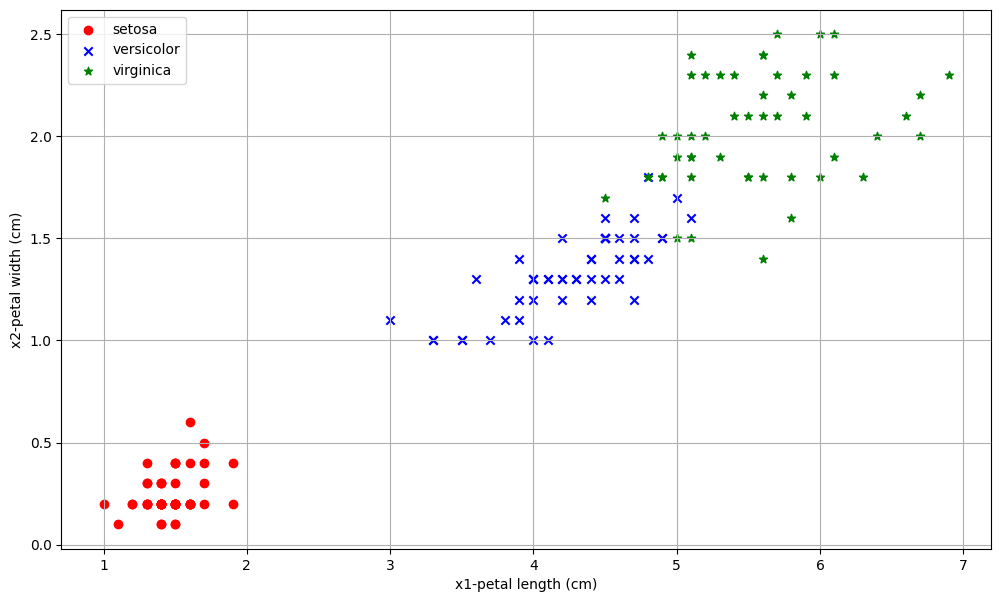

In [5]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150,0], X[100:150,1], color='green', marker='*', label='virginica')
plt.xlabel('x1-petal length (cm)')
plt.ylabel('x2-petal width (cm)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Documentación [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

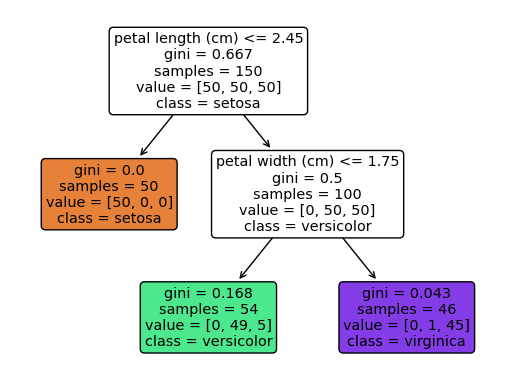

In [7]:
from sklearn import tree

tree.plot_tree(tree_clf,
               filled=True,
               rounded=True,
               class_names=['setosa', 'versicolor', 'virginica'],
               feature_names=iris.feature_names[2:]
               )
plt.show()

Instalador:
https://www.graphviz.org/download/

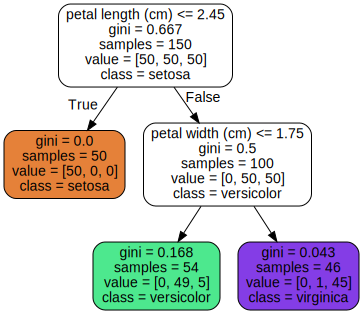

In [8]:
dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)  
graph

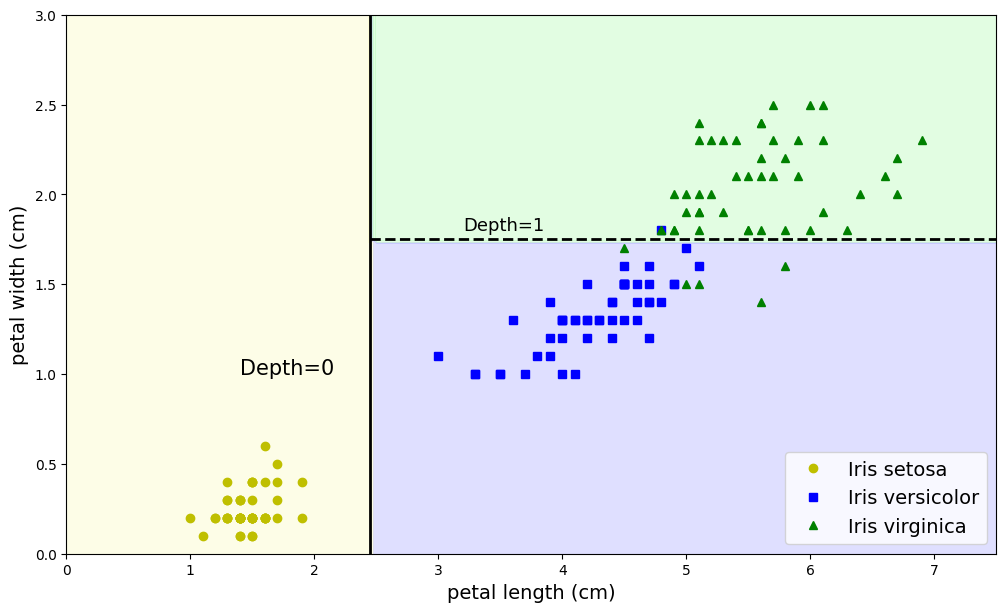

In [9]:
plt.figure(figsize=(12, 7))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

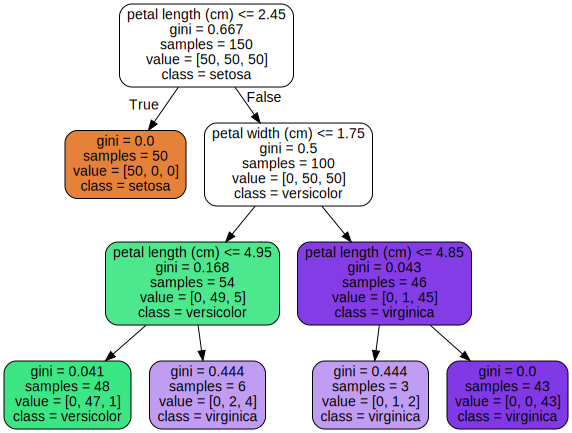

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X,y)

dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)  
graph

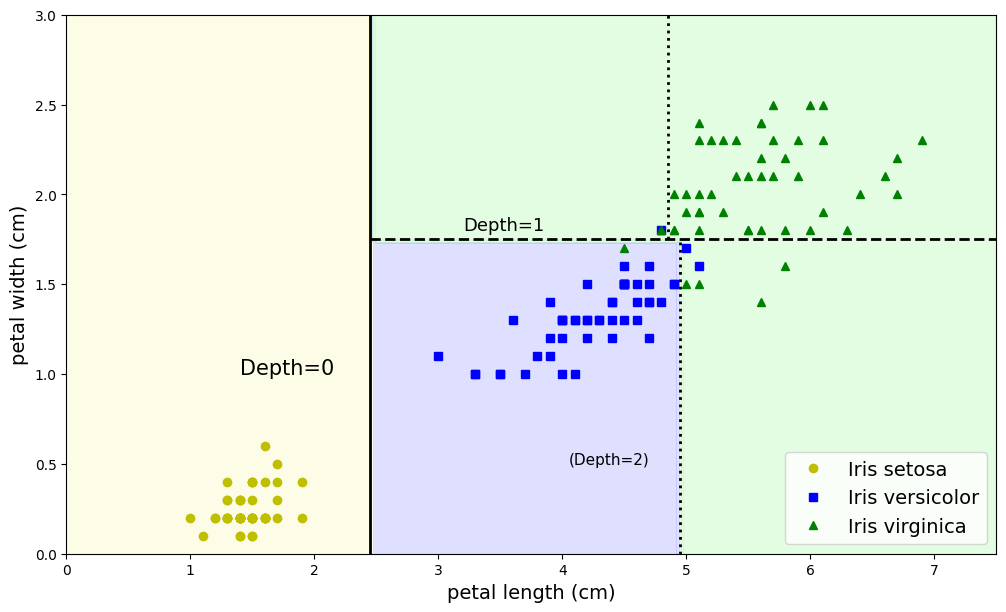

In [11]:
plt.figure(figsize=(12, 7))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# Entregable
En la siguiente tabla se tienen datos acerca de la realización o suspensión de partidos de tenis en función del pronóstico del tiempo:


<table>
    <tbody>
        <tr>
            <td> </td>
            <td>Pronóstico</td>
            <td>Temperatura</td>
            <td>Humedad</td>
            <td>Viento</td>
            <td>Juega</td>
        </tr>
        <tr>
            <td>1</td><td>soleado</td><td>calor</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>2</td><td>soleado</td><td>calor</td><td>alta</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>3</td><td>nublado</td><td>calor</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>4</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>5</td><td>lluvioso</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>6</td><td>lluvioso</td><td>frío</td><td>normal</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>7</td><td>nublado</td><td>frío</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>8</td><td>soleado</td><td>moderado</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>9</td><td>soleado</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>10</td><td>lluvioso</td><td>moderado</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>11</td><td>soleado</td><td>moderado</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>12</td><td>nublado</td><td>moderado</td><td>alta</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>13</td><td>nublado</td><td>calor</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>14</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>si</td><td>no</td>
        </tr>
    </tbody>
</table>



1. Construya a mano (haciendo todas las cuentas) y dibuje en papel el árbol binario de decisión que describa los datos sobre juegos de tenis del cuadro.
Utilice la impureza de entropía.

2. Construya el árbol de decisión usando la clase `DecisionTreeClassifier`, para esto será necesario codificar los datos que se encuentran en el archivo `juego_tennis.csv`. Utilice `LabelEncoder`, `OrdinalEncoder` o `OneHotEncoder` pruebe distintas formas de codificar. Obtiene las mismas particiones que el árbol hecho a mano? Si o No? Por qué?